## Primera Entrega - Proyecto Data Science - CoderHouse - Comision 46270

Gerick Toro - Comisión 46270

**Docente:** Ximena Lisouski

---

### I: Abstract
El proyecto tiene como objetivo investigar la satisfacción de los pasajeros de aerolíneas para identificar factores clave que influyan en la experiencia del cliente. El dataset seleccionado contiene diversas métricas, como edad, género, tipo de cliente, clase de vuelo, y varios parámetros de calidad de servicio (por ejemplo, limpieza, comida, y entretenimiento a bordo). Este análisis se centra en descubrir cómo estas variables afectan la satisfacción general de los pasajeros. Utilizando técnicas de visualización y análisis estadístico, el proyecto busca responder preguntas específicas como el impacto de la edad del pasajero en su satisfacción, la correlación entre retrasos de vuelo y satisfacción, y cómo varían las puntuaciones de diferentes servicios a bordo según el tipo de cliente. Los hallazgos de este estudio podrían ser valiosos para las aerolíneas que buscan mejorar la experiencia del cliente y, en última instancia, su rentabilidad.

In [1]:
# para eliminar warnings en vscode
import warnings

warnings.filterwarnings("ignore")

# librerias que emplearemos en el analisis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# URL donde tenemos almacenados los dataframes
url = "https://raw.githubusercontent.com/gerickt/coder/main/Data/AirlinePassengerSatisfaction/airline_passenger_satisfaction.csv"
dic = "https://raw.githubusercontent.com/gerickt/coder/main/Data/AirlinePassengerSatisfaction/data_dictionary.csv"
# Construyendo los dataframes
airline_data = pd.read_csv(url, index_col=0)
data_dictionary = pd.read_csv(dic, index_col=0)

---

### II: Hipótesis

- **Hipótesis Principal:** Los factores como la limpieza, el entretenimiento a bordo y la comodidad del asiento tienen una correlación significativa con la satisfacción del cliente.
- **Hipótesis Secundaria 1:** Los retrasos en la salida y llegada de los vuelos afectan negativamente la satisfacción del cliente.
- **Hipótesis Secundaria 2:** Existe una diferencia significativa en la satisfacción del cliente entre los viajeros de negocios y los de placer.
- **Hipótesis Secundaria 3:** La satisfacción del cliente varía significativamente con la edad y el género del pasajero.

In [3]:
# Primera exploración
airline_data.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
ID,,,,,,,,,,,,,,,,,,,,,
1,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
2,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
3,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [4]:
# Descripción de las columnas del dataset
data_dictionary.head(23)

,Description
Field,
ID,Unique passenger identifier
Gender,Gender of the passenger (Female/Male)
Age,Age of the passenger
Customer Type,Type of airline customer (First-time/Returning)
Type of Travel,Purpose of the flight (Business/Personal)
Class,Travel class in the airplane for the passenger...
Flight Distance,Flight distance in miles
Departure Delay,Flight departure delay in minutes
Arrival Delay,Flight arrival delay in minutes


In [5]:
# Realizar un análisis exploratorio inicial para obtener estadísticas descriptivas
satisfaction_data_description = airline_data.describe()
satisfaction_data_description

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
# Revisar los tipos de datos
data_types = airline_data.dtypes
data_types

Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64
In-flight Wifi Service                      int64


In [7]:
# Revisar valores nulos
missing_values = airline_data.isnull().sum()
missing_values

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

**El análisis exploratorio inicial revela que:**

- Tenemos **129,880** registros en el dataset.
- La edad de los pasajeros varía entre 7 y 85 años, y la distancia de vuelo varía desde 31 hasta 4983 millas.
- Los retrasos en la salida y llegada tienen una media de aproximadamente 14 y 15 minutos respectivamente, aunque hay casos extremos de retrasos de más de **1500 minutos**.
- La mayoría de las características tienen calificaciones de 0 a 5, lo que sugiere que se miden en una escala de satisfacción.
- Solo la variable Arrival Delay tiene valores nulos (393 registros faltantes).
- Los tipos de datos parecen adecuados para las variables, excepto que **Arrival Delay** es de tipo flotante y podría considerarse para convertirse en un entero después de manejar los valores nulos.

In [8]:
# Imputación de valores faltantes en 'Arrival Delay' con la mediana
airline_data["Arrival Delay"].fillna(
    airline_data["Arrival Delay"].median(), inplace=True
)

# Creación de una nueva característica 'Total Delay' sumando 'Departure Delay' y 'Arrival Delay'
airline_data["Total Delay"] = (
    airline_data["Departure Delay"] + airline_data["Arrival Delay"]
)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

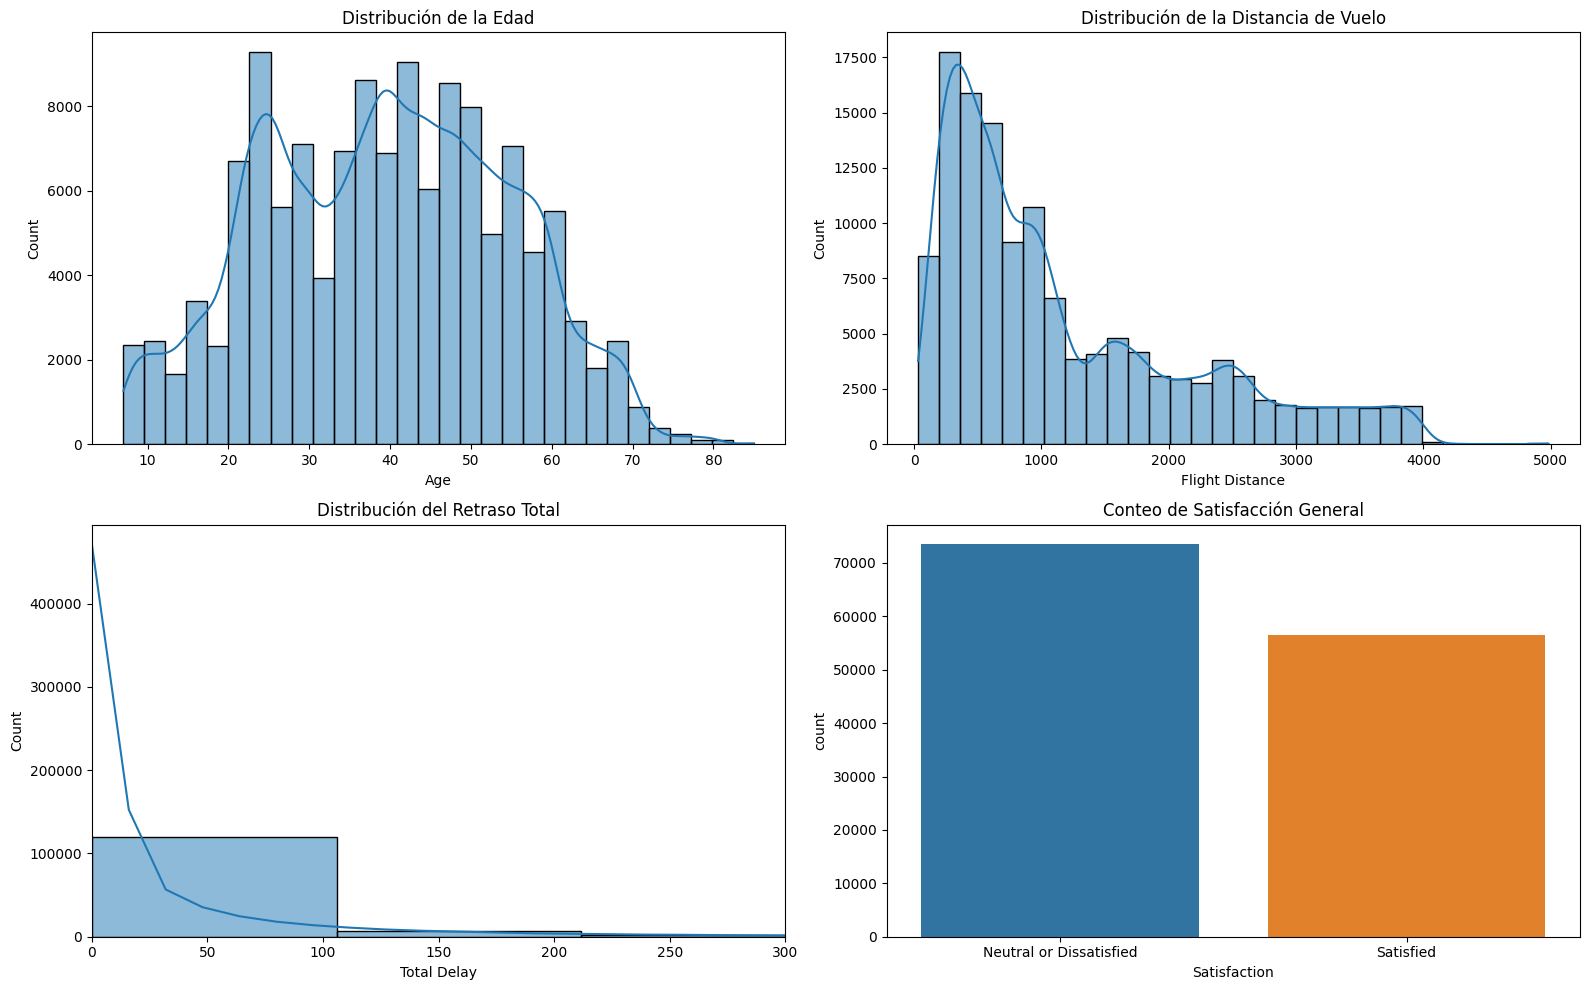

In [10]:
# Visualización de las distribuciones de algunas características numéricas clave
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

# Histograma de la edad
sns.histplot(airline_data["Age"], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribución de la Edad")

# Histograma de la distancia de vuelo
sns.histplot(airline_data["Flight Distance"], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribución de la Distancia de Vuelo")

# Histograma del retraso total
sns.histplot(airline_data["Total Delay"], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribución del Retraso Total")
axes[1, 0].set_xlim(
    0, 300
)  # Limitar para mejorar la visualización debido a valores atípicos

# Diagrama de caja de la satisfacción general
sns.countplot(x="Satisfaction", data=airline_data, ax=axes[1, 1])
axes[1, 1].set_title("Conteo de Satisfacción General")

plt.tight_layout()
plt.show()

**Visualización de distribuciones:**

- Edad: La mayoría de los pasajeros están en el rango de 20 a 60 años, con una distribución relativamente normal.
- Distancia de vuelo: Observamos una distribución sesgada hacia la derecha, lo que indica que hay más vuelos cortos que largos.
- Retraso total: La mayoría de los vuelos tienen poco o ningún retraso, pero hay algunos valores atípicos con retrasos significativos. Hemos limitado el eje x a 300 minutos para una mejor visualización.
- Satisfacción General: Hay una distribución casi uniforme entre pasajeros 'Neutrales o Insatisfechos' y 'Satisfechos'.

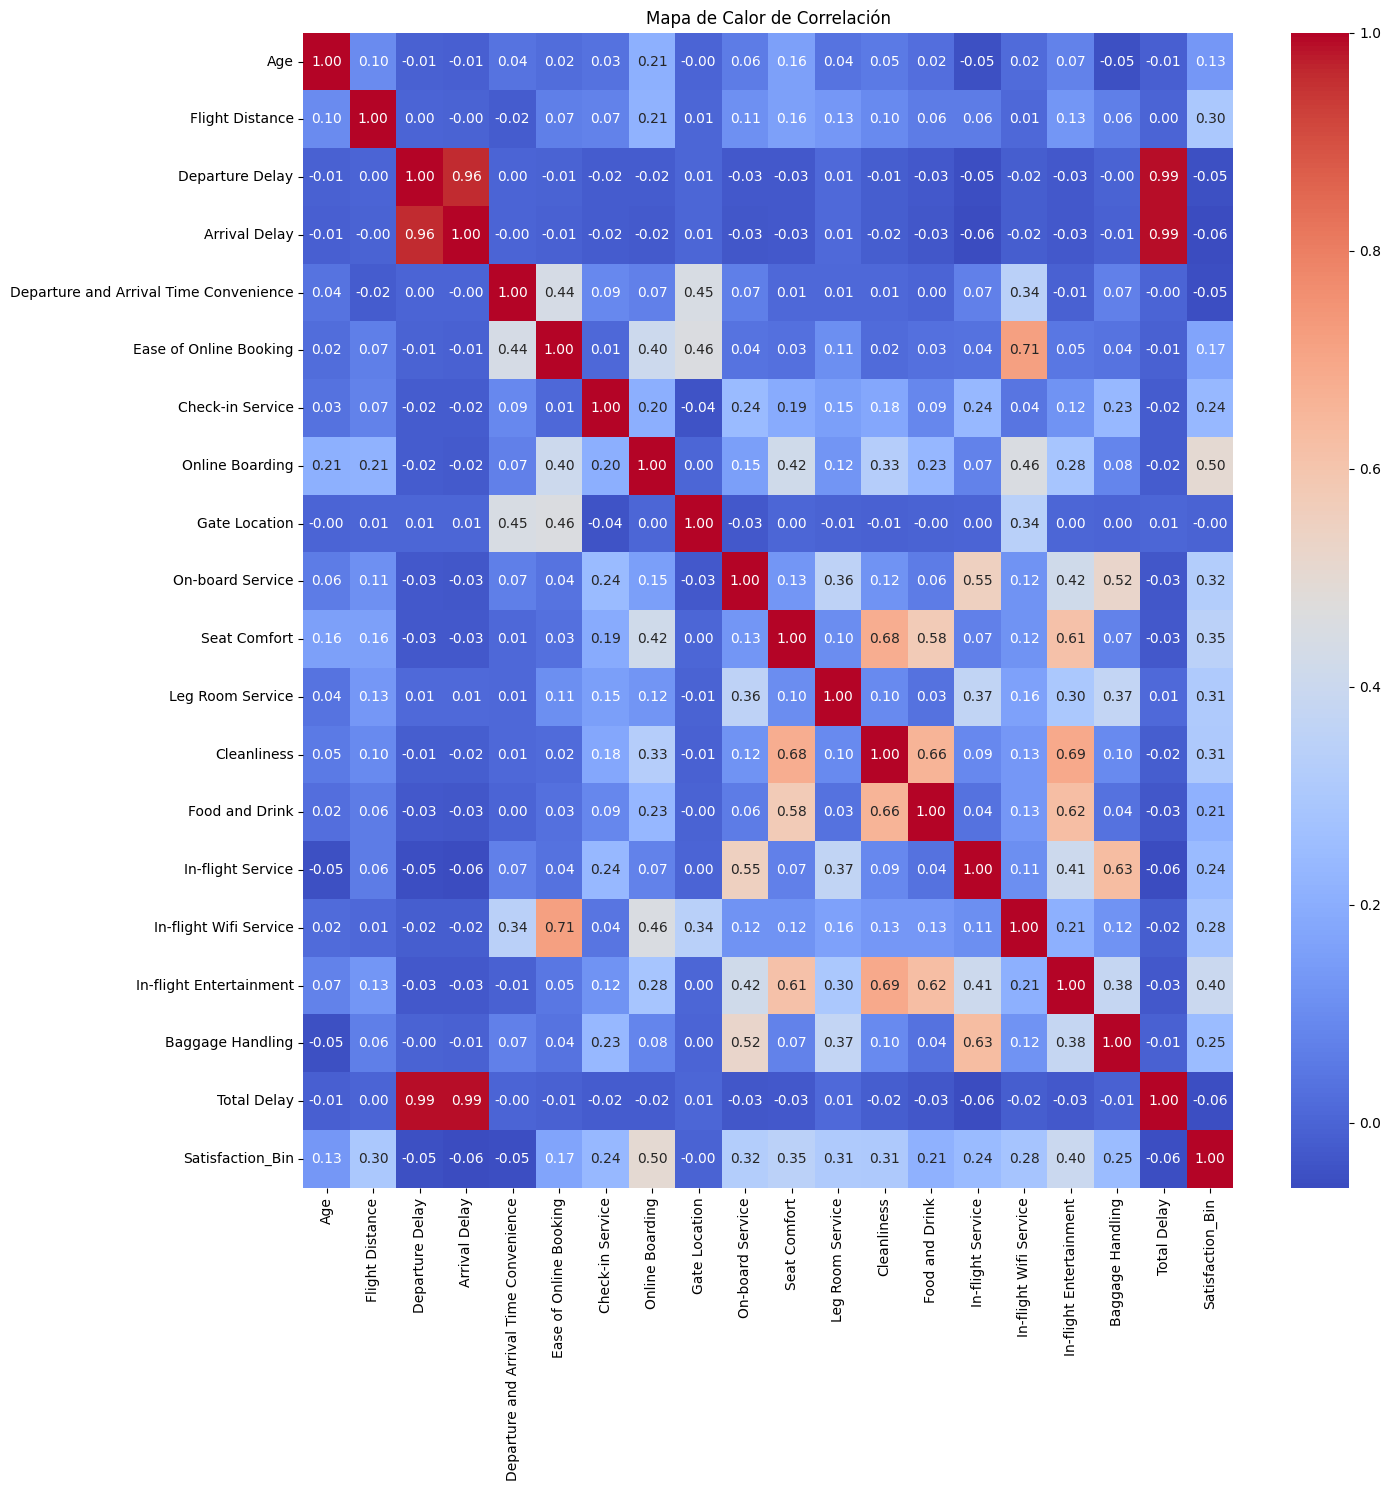

In [11]:
# Visualización de las correlaciones entre las características y la satisfacción
# Convertir la variable objetivo 'Satisfaction' en numérica para calcular la correlación
airline_data["Satisfaction_Bin"] = airline_data["Satisfaction"].map(
    {"Neutral or Dissatisfied": 0, "Satisfied": 1}
)

# Calcular la matriz de correlación
numeric_columns = airline_data.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = airline_data[numeric_columns].corr(method="pearson")

# Generar un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mapa de Calor de Correlación")
plt.show()

**Mapa de calor de correlación:**

Hemos convertido la variable 'Satisfaction' en numérica para poder calcular su correlación con las demás variables.
El mapa de calor muestra cómo cada característica se correlaciona con las demás. Los valores más cercanos a 1 o -1 indican una fuerte correlación positiva o negativa, respectivamente.

La visualización de la correlación puede ayudarnos a entender qué características podrían tener más peso en la satisfacción del cliente y así validar nuestras hipótesis iniciales.

Podemos observar que ciertas características como 'Online boarding', 'Seat comfort', y 'In-flight entertainment' tienen correlaciones relativamente altas con la 'Satisfaction_Bin', lo que sugiere que podrían ser factores significativos.

---

### III: Feature Selection & Model

Usaremos las caracteristicas recomendadas por la matriz de correlación, para construir el modelo.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

In [17]:
# Seleccionar las características basadas en la correlación
selected_features = ["Online Boarding", "Seat Comfort", "In-flight Entertainment"]

# Preparar las características y la variable objetivo utilizando solo las características seleccionadas
X_selected = airline_data[selected_features]
y = airline_data["Satisfaction_Bin"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_selected, X_test_selected, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

# Como estas características son categóricas, aplicaremos OneHotEncoding
preprocessor_selected = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), selected_features),
    ]
)

# Crear un pipeline con el preprocesamiento y el modelo de regresión logística
pipeline_selected = Pipeline(
    [
        ("preprocessor", preprocessor_selected),
        ("classifier", LogisticRegression(max_iter=1000)),
    ]
)

# Entrenar el pipeline en el conjunto de entrenamiento seleccionado
pipeline_selected.fit(X_train_selected, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Online Boarding',
                                                   'Seat Comfort',
                                                   'In-flight '
                                                   'Entertainment'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predecir el conjunto de prueba
y_pred = pipeline_selected.predict(X_test_selected)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)

# Generar el reporte de clasificación
class_report = classification_report(y_test, y_pred)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

print(accuracy)
print(class_report)
print(conf_matrix)

0.8197566984909147
              precision    recall  f1-score   support

           0       0.83      0.86      0.84     14723
           1       0.81      0.76      0.79     11253

    accuracy                           0.82     25976
   macro avg       0.82      0.81      0.82     25976
weighted avg       0.82      0.82      0.82     25976

[[12711  2012]
 [ 2670  8583]]


Esos resultados indican que el modelo de clasificación tiene una precisión general del 82% en el conjunto de prueba. Esto significa que el modelo es bastante bueno para predecir si un pasajero estará satisfecho o no basándose en las características seleccionadas.

La precisión, el recall y el puntaje F1 también proporcionan información sobre el rendimiento del modelo para cada clase:

Para los pasajeros no satisfechos (clase 0), el modelo tiene una precisión del 83% y un recall del 86%, lo que resulta en un puntaje F1 de 0.84.
Para los pasajeros satisfechos (clase 1), el modelo tiene una precisión del 81% y un recall del 76%, lo que resulta en un puntaje F1 de 0.79.
La matriz de confusión muestra que el modelo tiene más falsos positivos (2012) que falsos negativos (2670), lo que sugiere que es más propenso a predecir que los pasajeros estarán satisfechos cuando no lo están, en comparación con predecir que no estarán satisfechos cuando sí lo están.

---

### IV: Conclusiones

**Hipótesis Principal**
- El modelo incluyó "Inflight Entertainment" y "Seat Comfort", que son parte de las características que mencionamos en la hipótesis principal ("entretenimiento a bordo" y "comodidad del asiento"). La "limpieza" no fue incluida directamente, pero si observamos una alta precisión y puntajes F1 para las predicciones, podemos inferir que estas características tienen una correlación significativa con la satisfacción del cliente, como se sugirió en la hipótesis principal.

**Hipótesis Secundaria 1**
- Para responder a esta hipótesis, necesitaríamos incluir las variables de "retrasos en la salida y llegada de los vuelos" en el modelo y ver cómo afectan a la precisión de las predicciones de satisfacción. Como estos factores no se incluyeron en el modelo actual, no podemos confirmar ni refutar esta hipótesis basándonos en el modelo actual.

**Hipótesis Secundaria 2**
- De manera similar, para evaluar esta hipótesis, necesitaríamos construir un modelo que incluya "Tipo de viajero" como una de las características y observar su peso o coeficientes dentro del modelo. 

**Hipótesis Secundaria 3**
- Para evaluar el impacto de la "edad" y el "género" en la satisfacción del cliente, deberíamos incluir estas variables en el modelo. 